In [34]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [102]:
#file_fast = uproot.open("/data/xenon/acolijn/G4FastSim/fast/fast_test.root")
#file_std = uproot.open("/data/xenon/acolijn/G4FastSim/standard/standard_test.root")
file_fast = uproot.open("/data/xenon/acolijn/G4FastSim/fast/fast_pencil.root")
file_std = uproot.open("/data/xenon/acolijn/G4FastSim/standard/standard_pencil.root")

fast = file_fast["ev"].arrays()
std = file_std["ev"].arrays()

cut = (std['ncomp']+std['nphot']==1) & (std['type']==0)
cute = (std['eh']>1.)


xh =ak.to_numpy(ak.flatten(std['xh'][cut & cute]))
yh =ak.to_numpy(ak.flatten(std['yh'][cut & cute]))
zh =ak.to_numpy(ak.flatten(std['zh'][cut & cute]))
eh =ak.to_numpy(ak.flatten(std['eh'][cut & cute]))

cutf = (fast['ncomp']+fast['nphot']==1) & (fast['type']==0)
cutfe = (fast['eh']>0.)
xf =ak.to_numpy(ak.flatten(fast['xh'][cutf &cutfe]))
yf =ak.to_numpy(ak.flatten(fast['yh'][cutf &cutfe]))
zf =ak.to_numpy(ak.flatten(fast['zh'][cutf &cutfe]))
ef =ak.to_numpy(ak.flatten(fast['eh'][cutf &cutfe]))
wf =ak.to_numpy(ak.flatten(fast['wh'][cutf &cutfe]))

w = ak.to_numpy(fast['w'][cutf]) 

nstandard = len(ak.to_numpy(std['nclus'][cut]))
nfast = np.sum(np.exp(ak.to_numpy(fast['w'][cutf])))

rel_weight = nstandard/nfast
print('nstandard',nstandard)
print('nfast',nfast)
print('rel_weight',rel_weight)


nstandard 9707
nfast 13.293677858973966
rel_weight 730.1967223048991


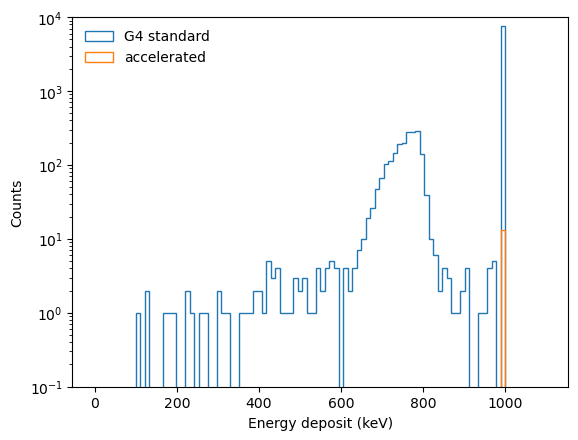

In [107]:
h = plt.hist(std['e'][cut], bins=100, histtype='step', range=(0,1100), label='G4 standard')
h = plt.hist(fast['e'][cutf], weights=np.exp(w), bins=100, histtype='step', range=(0,1100), label='accelerated')
#rh = np.sqrt(xh**2+yh**2)
#c = (rh<1180) 
#h = plt.hist(eh[(rh<1180)], bins=100, histtype='step', range=(0,1100), label='G4 standard')
#rf = np.sqrt(xf**2+yf**2)
#h = plt.hist(ef[rf<1180], weights=np.exp(wf[rf<1180]), bins=100, histtype='step', range=(0,1100), label='accelerated')
#h = plt.hist(fast['e'][cutf], bins=100, histtype='step', range=(0,1100), label='fast')


plt.ylim(0.1,0.1e5)
plt.yscale('log')
plt.xlabel('Energy deposit (keV)')
plt.ylabel('Counts')
plt.legend(frameon=False)

plt.show()

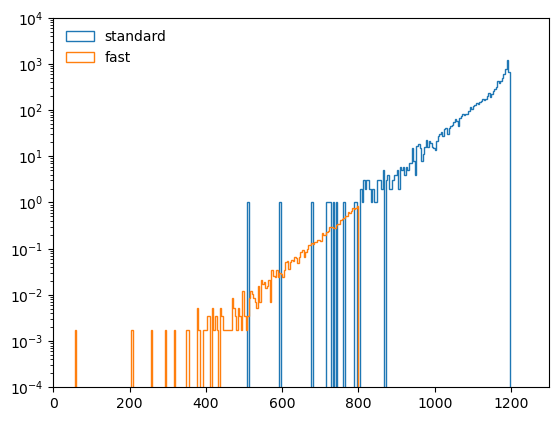

In [106]:
nb = 500

h= plt.hist(np.sqrt(xh**2+yh**2), bins=nb, histtype='step', range=(0,2000), label='standard')
h= plt.hist(np.sqrt(xf**2+yf**2), weights=np.exp(wf), bins=nb, histtype='step', range=(0,2000),label='fast')
#h= plt.hist(np.sqrt(xf[fid]**2+yf[fid]**2), bins=200, histtype='step', range=(0,2000),label='fast')

plt.yscale('log')

#plt.xlim(1100,1200)
plt.ylim(1e-4,1e4)
plt.xlim(0,1300)
plt.legend(frameon=False)
plt.show()

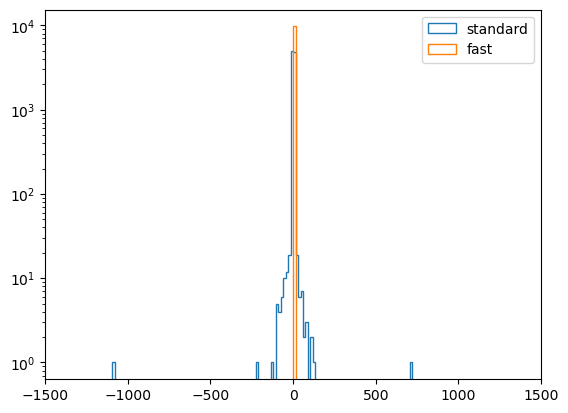

In [105]:
nb = 200

h= plt.hist(zh, bins=nb, histtype='step', range=(-1500,1500), label='standard')
h= plt.hist(zf, weights=np.exp(wf)*rel_weight, bins=nb, histtype='step', range=(-1500,1500),label='fast')
#h= plt.hist(np.sqrt(xf[fid]**2+yf[fid]**2), bins=200, histtype='step', range=(0,2000),label='fast')

plt.yscale('log')

#plt.xlim(1100,1200)
#plt.ylim(1,1e4)
plt.xlim(-1500,1500)
plt.legend()
plt.show()

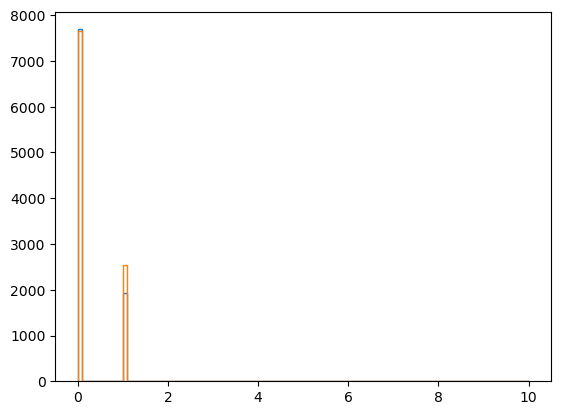

In [25]:
h=plt.hist(std['ncomp'][cut],bins=100, range=(0,10), histtype='step')
h=plt.hist(fast['ncomp'][cutf],weights=np.exp(fast['w']), bins=100, range=(0,10), histtype='step')


(array([    0.        , 10202.84346956,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 [<matplotlib.patches.Polygon at 0x7f75045c5ed0>])

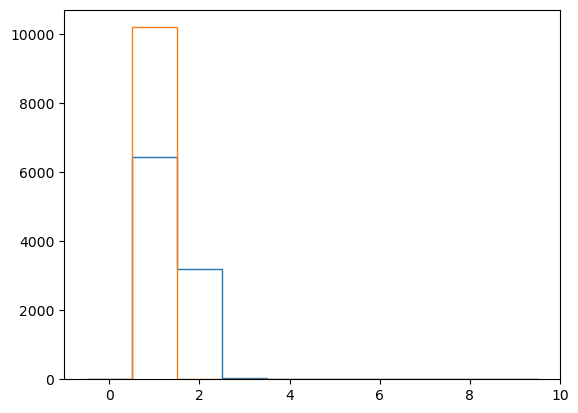

In [57]:
plt.hist(std['nclus'][cut], bins=10, range=(-0.5,9.5), histtype='step', label='standard')
plt.hist(fast['nclus'][cutf], weights=np.exp(fast['w']), bins=10, range=(-0.5,9.5), histtype='step', label='fast')